<h1>Image classification using CNN tensorflow/keras </h1>
<h3>
this project focus on detecting the the traffic signs on the road 
</h3>

<h3>1st we need to import iur libraries and dependencies </h3>
<div><ul>
  <li>numpy : we will need it to convert the images into numpy arrays to classify it and pass it to the layers</li>
  <li>pandas : we will need it to read csv files and make some dashboards to analyze our data and progress</li>
  <li>os : we will need it to access to our files in the computer </li>
  <li>cv2 : we will need this to read our (png,jpg,jpeg) images </li>
  <li>matplotlib : we will need this to diplay our dashboards and display our images </li>
  <li>tensorflow : thats our deep learning library we will use to implement the CNN  </li>
  <li>keras : we will use it to build our CNN architechture  </li>
  <li>PIL : we will use it to convert our images to array by fromarray method </li>
  <li>train_test_split : we will import this from sklearn to split our data into train and test and the x's and y's </li>  
  <li>ImageDataGenerator : we will use this for the data augmentation </li>  
  <li>Adam : thats our optmizer class that we will use </li>
  <li>accuracy_score : we will use it to calculate the accuracy score of our test predictions </li>
  <li>np.randon.seed(42) that will give use a random numbers from 0 to 42 </li>  
  <li>style : this is just a style for our sheets </li>  
</ul>
    </div>

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)
from matplotlib import style
style.use('fivethirtyeight')

<h4>here we will save our data paths for storing it later<br><br><br>
and making variables for our image shape which is 30 height and 30 width and 3 channels</h4>

In [2]:
data_dir = 'C:\\Users\\ahmed\\CNN project\\Categorial CNN project\\traffic signs'
train_path = 'C:\\Users\\ahmed\\CNN project\\Categorial CNN project\\traffic signs\\Train'
test_path = 'C:\\Users\\ahmed\\CNN project\\Categorial CNN project\\traffic signs\\'


IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

<h4>here we make a new variables that is equal to the number of folders in the training directory </h4>

In [3]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

<h4>now we declare our dictionary of classes</h4>

In [4]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

<h2>here we are going to compare our classes fequencies inthe training directory , HOW</h2>
<h4>now we make variable named folders and two lists train_number and class_num <br><br>
we will start a for loop that will make the variable folder go through the list folders values and store the number images in that folder in train_files <br><br> then append that number two train_number list <br><br>
then we will store the values of the classes dic of index train_num in class_num list
    and then we will zip it and sort it to plot it vertically to show us which class has the heighst amount of images
</h4>

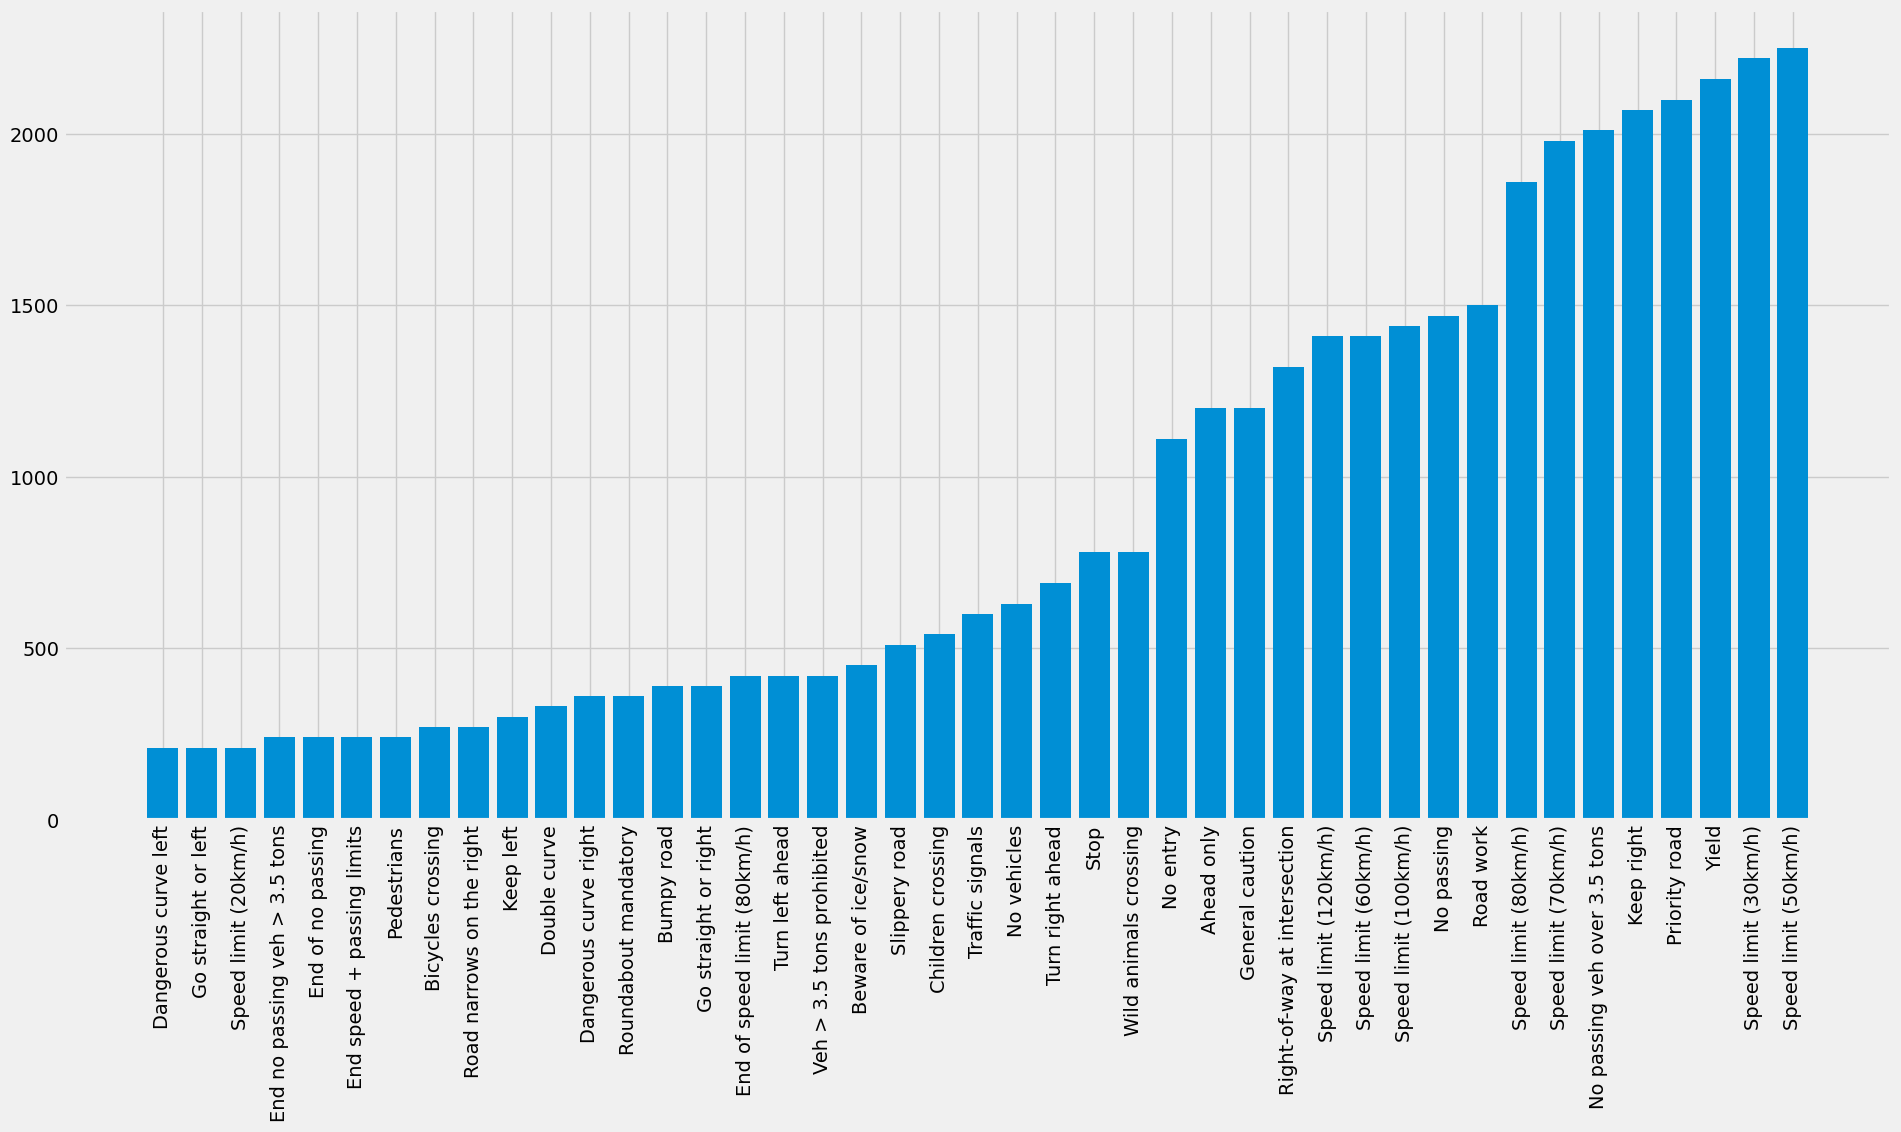

In [5]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

<h3>now we will diplay a random images from the test folder </h3>
<h4>first we will read the test.csv by pandas  and store the images path values in imgs and then we will make a for loop to loop through it and diplay a 25 random image from the test folder</h4>

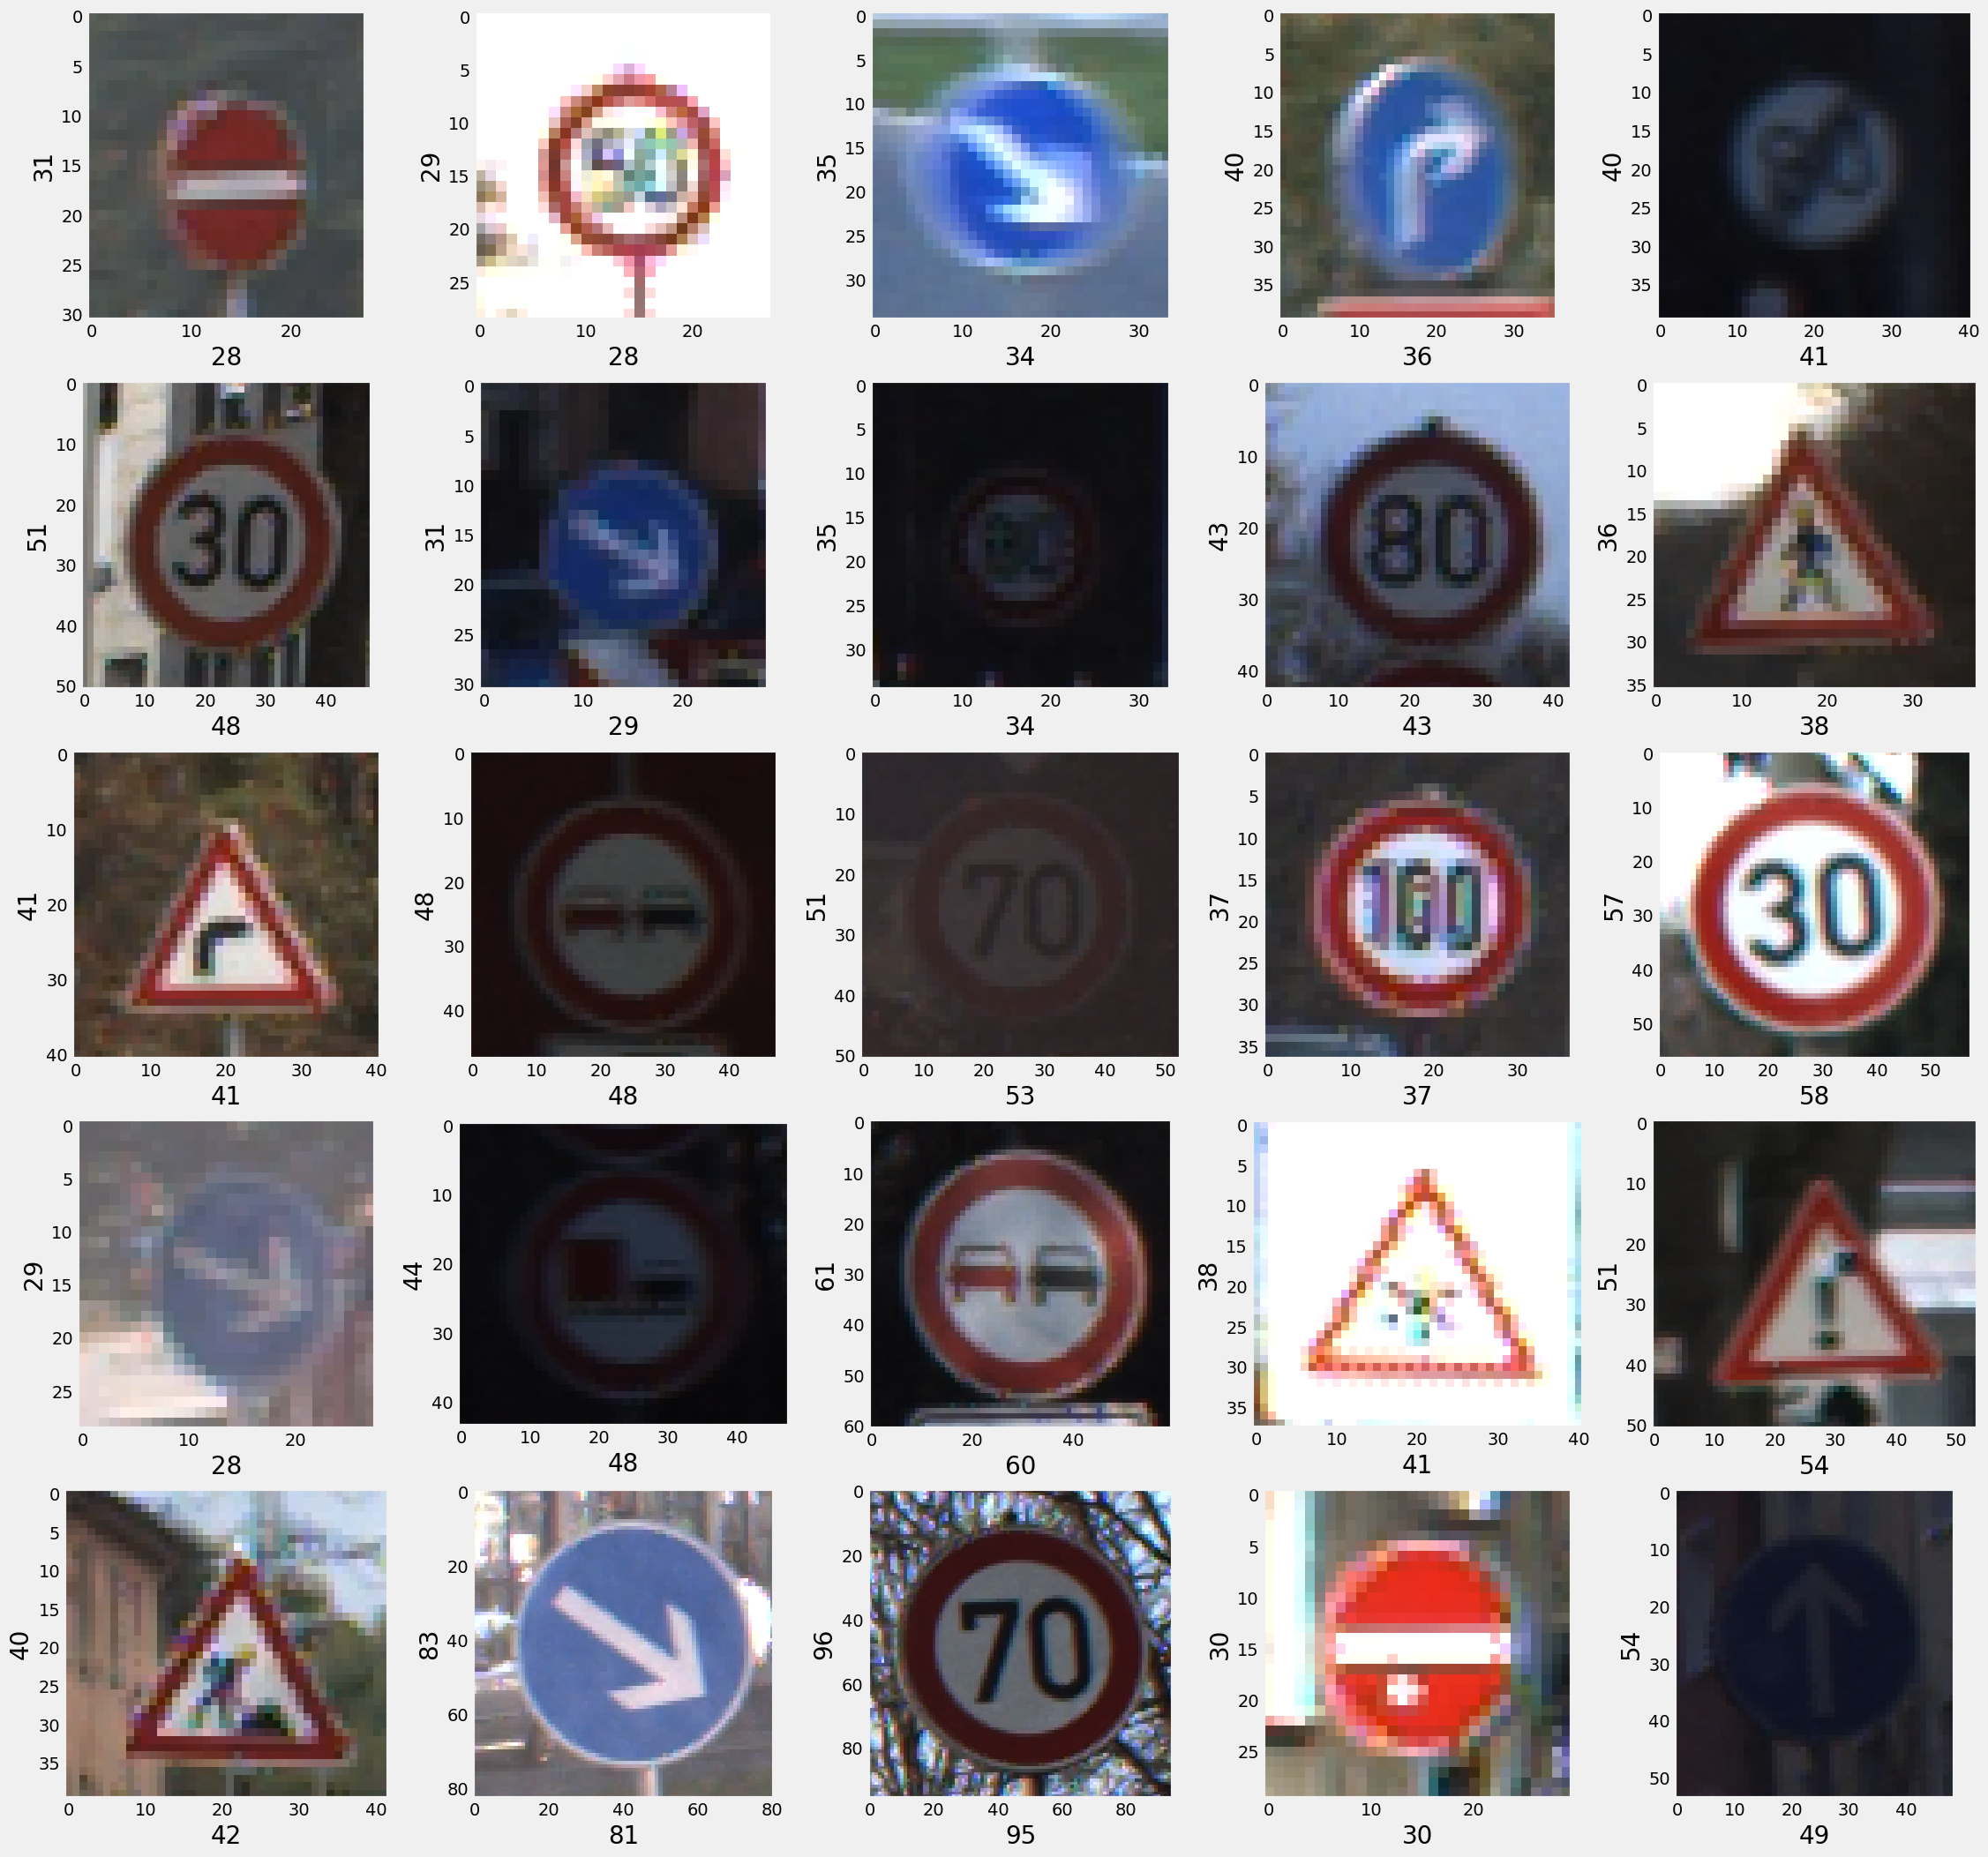

In [6]:
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(visible=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

<h3>now we will store our images</h3>
<h4>first we will start a for loop through the number of categories we have and then we will go through our image paths <br><br> 
then we will read each image using the cv2 and then we will use the Image.fromarray to read the array version of the image of the RGB <br><br>
and then we will resize it image according to our height and width we stored<br><br>
then we will append the np.array of the resized image and store the index in the label list<br><br>
then we will convert those lists to numpy array</h4>

In [7]:
 image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


<h4>now we shuffle our data</h4>

In [8]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

<h4>now wew split our data to train and validation by 70% and 30%</h4>

In [9]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


<h4>now we gonna convert our data into categorial data to use it in the multiclass classification</h4>

In [10]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


<h2>Building the CNN architechture</h2>
<h3>we will use the relu functionto make the values from zero to positive and the softmax function to get the output of the categorial function<br><br>
so our CNN consists of two convulutional layers and a maxpooling then a batch normalization then another 4 layers like those and finally our connected layers </h3>

In [11]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

<h3>if you still didnt get that architecture this is the model summary </h3>

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 128)         7

<h3>here we are setting our learning rate to the Adam optimizer class and then making the number of epochs and then compile our model in the loss of categorical_crossentropy because we have a multiple classes </h3>

In [13]:
lr = 0.001
epochs = 30

opt = Adam(learning_rate=lr)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

<h2> Model training</h2> 

In [14]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

hist = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
858/858 [==============================] - 66s 75ms/step - loss: 1.0398 - accuracy: 0.7192 - val_loss: 0.1685 - val_accuracy: 0.9481
Epoch 2/30
858/858 [==============================] - 61s 71ms/step - loss: 0.1982 - accuracy: 0.9393 - val_loss: 0.0501 - val_accuracy: 0.9861
Epoch 3/30
858/858 [==============================] - 61s 71ms/step - loss: 0.1139 - accuracy: 0.9661 - val_loss: 0.0588 - val_accuracy: 0.9795
Epoch 4/30
858/858 [==============================] - 61s 72ms/step - loss: 0.0891 - accuracy: 0.9723 - val_loss: 0.0361 - val_accuracy: 0.9889
Epoch 5/30
858/858 [==============================] - 61s 72ms/step - loss: 0.0763 - accuracy: 0.9758 - val_loss: 0.1204 - val_accuracy: 0.9609
Epoch 6/30
858/858 [==============================] - 62s 72ms/step - loss: 0.0778 - accuracy: 0.9771 - val_loss: 0.0109 - val_accuracy: 0.9966
Epoch 7/30
858/858 [==============================] - 63s 73ms/step - loss: 0.0707 - accuracy: 0.9787 - val_loss: 0.0220 - val_accuracy:

<h4>now we plot the accuracy of our training 
</h4>

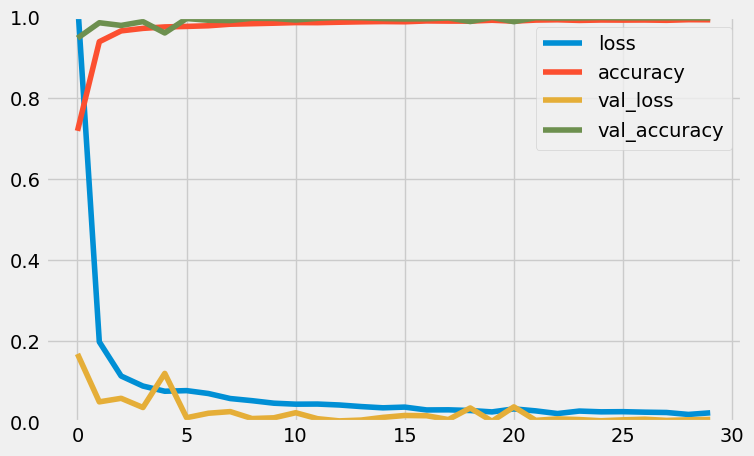

In [15]:
pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<h4>storing the test images and pred there categories and print the accuracy</h4>

In [16]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = np.argmax(model.predict(X_test),axis=1)


print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

395/395 [==============================] - 5s 11ms/step
Test Data accuracy:  98.2264449722882


<h4>printing the report of the classification</h4>

In [17]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        60
           1       0.99      1.00      0.99       720
           2       1.00      1.00      1.00       750
           3       0.99      0.98      0.98       450
           4       1.00      1.00      1.00       660
           5       0.98      0.99      0.99       630
           6       1.00      0.95      0.98       150
           7       0.98      1.00      0.99       450
           8       1.00      1.00      1.00       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.93      1.00      0.96       420
          12       0.98      1.00      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       1.00      1.00      1.00       210
          16       0.99      1.00      0.99       150
          17       1.00    

<h4>display the images with the predictions</h4>

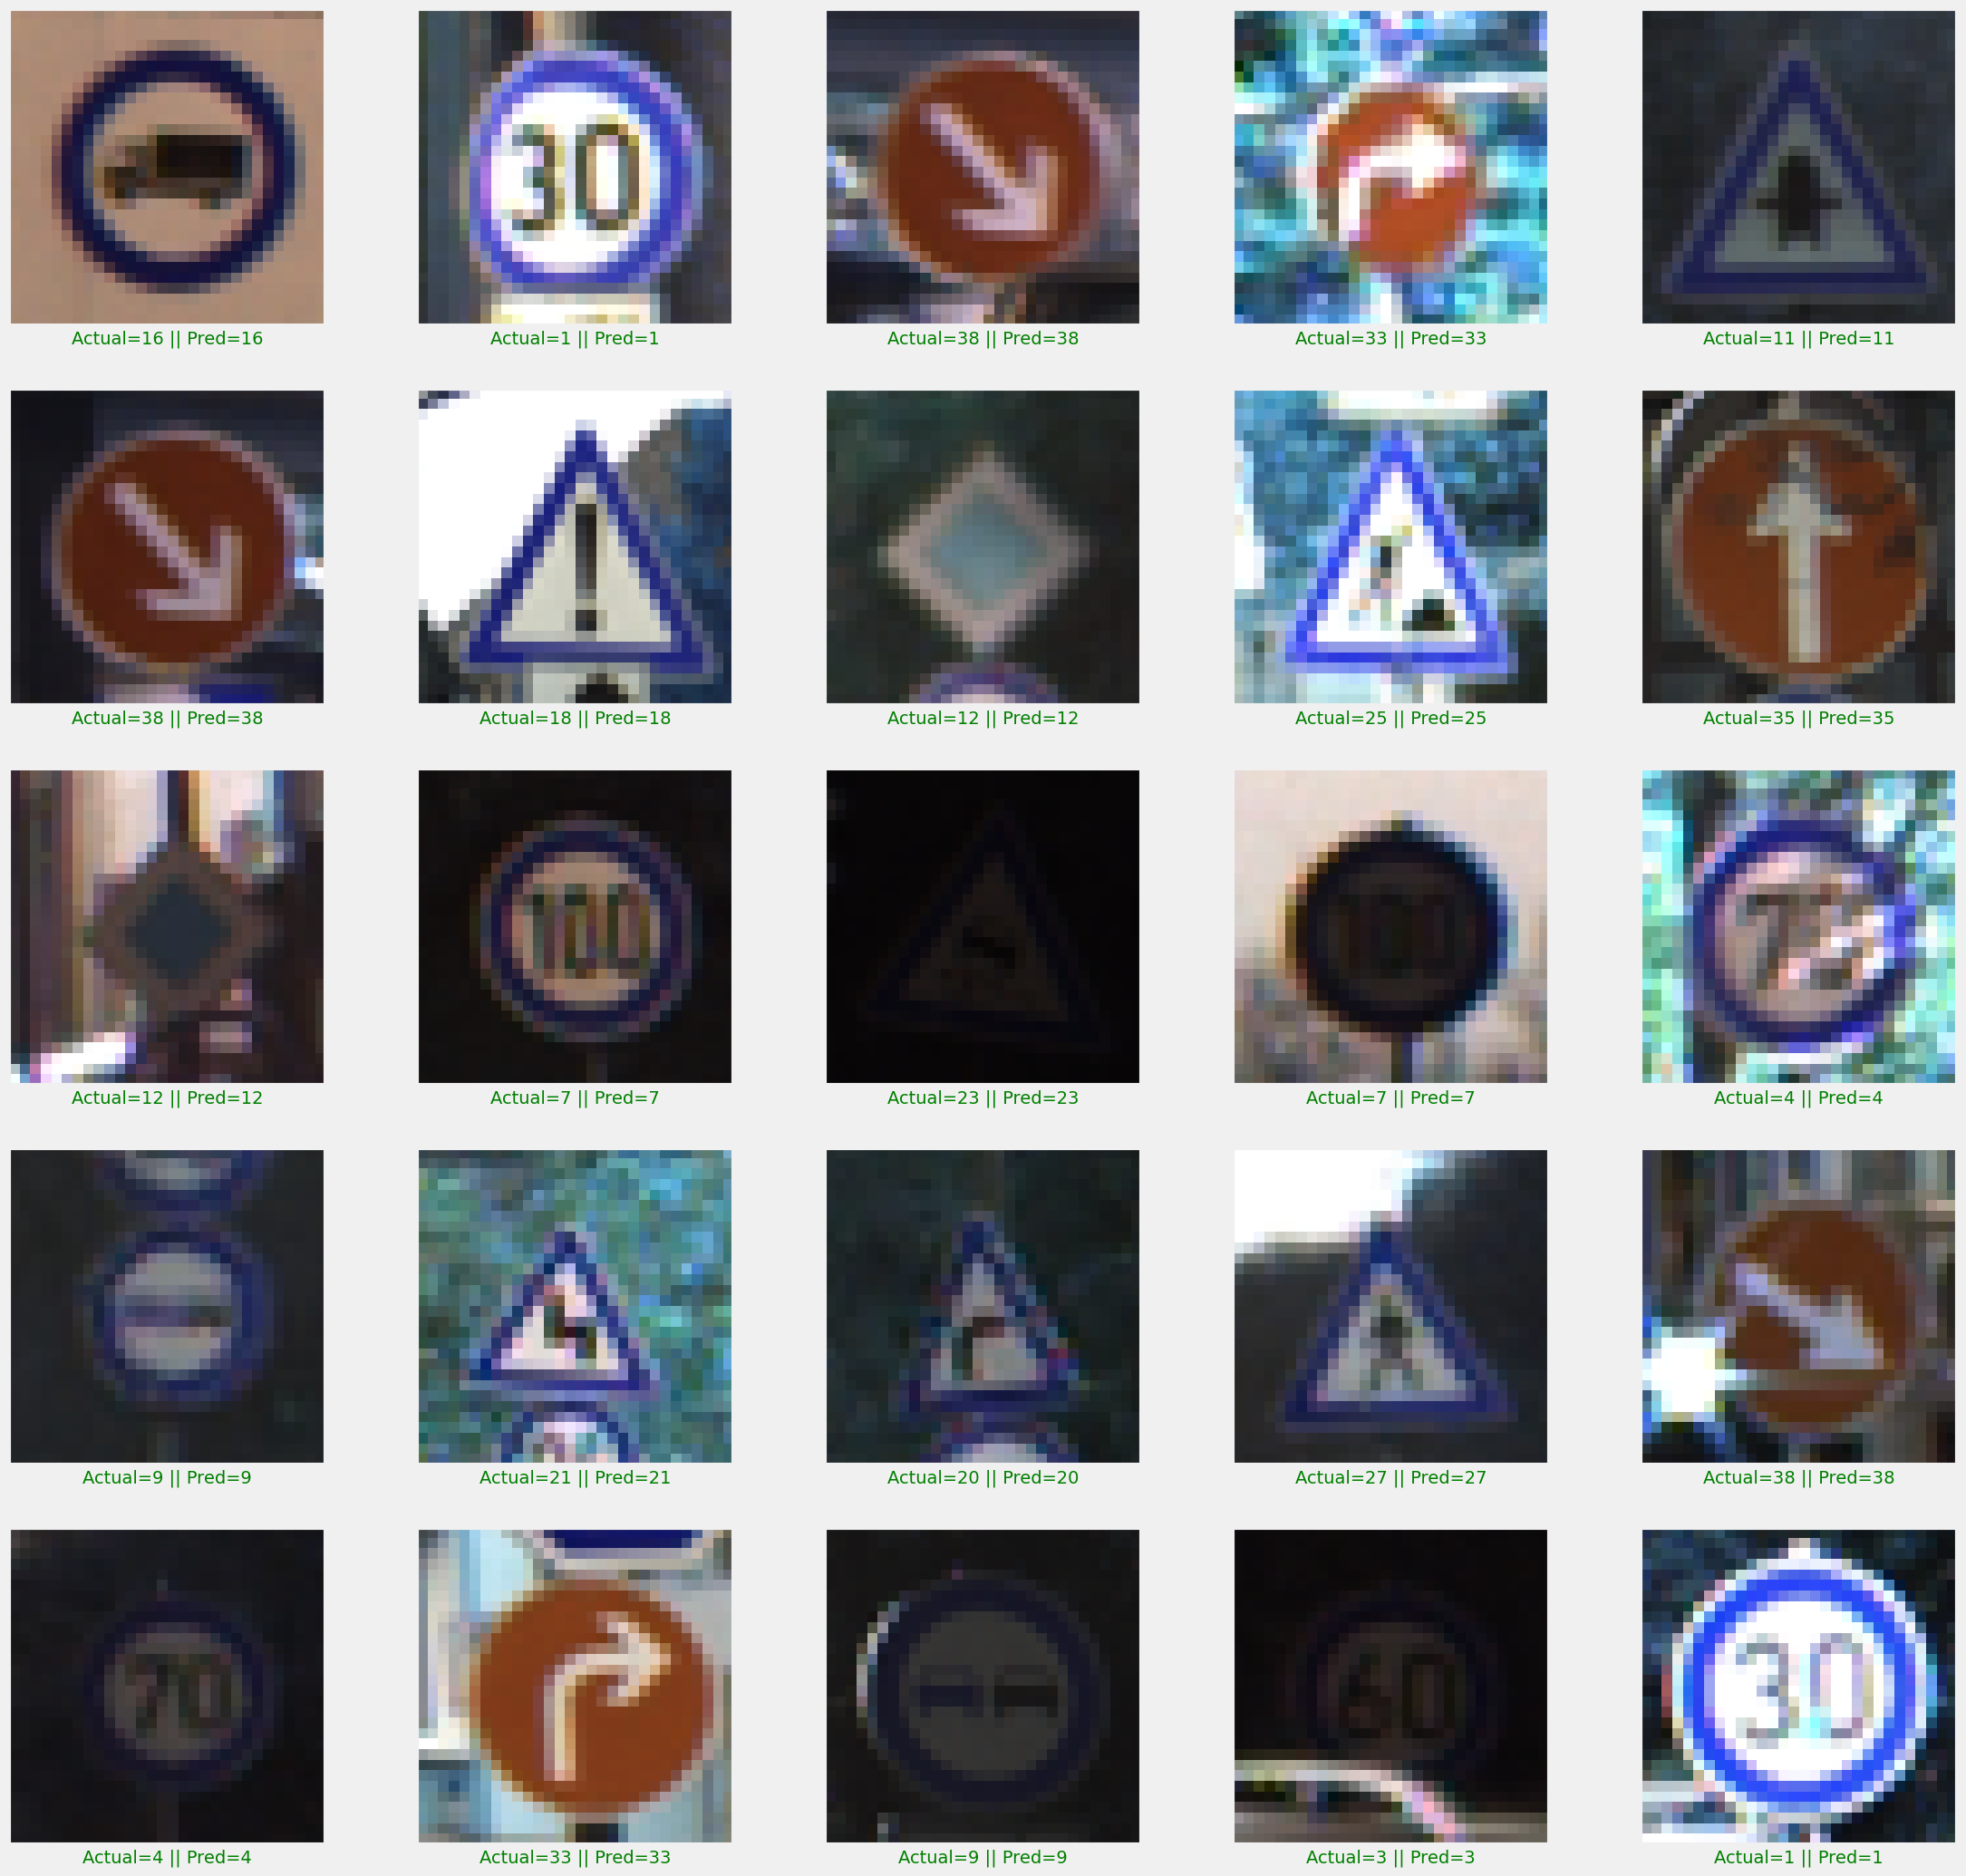

In [18]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

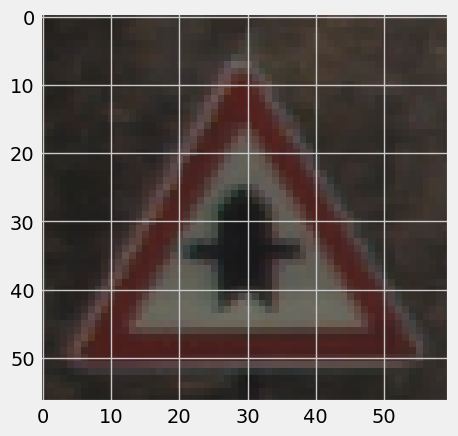

In [20]:
img = cv2.imread('00004.png')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

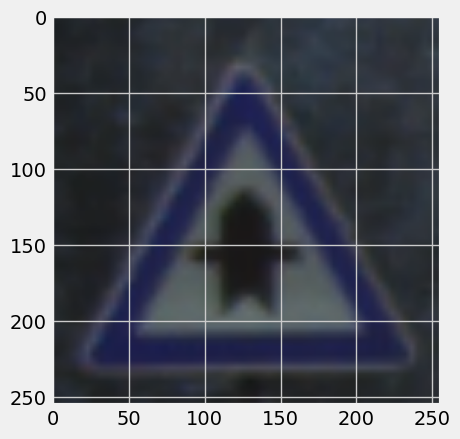

In [21]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [22]:
data =[]
image = cv2.imread('00004.png')
image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
data.append(np.array(resize_image))
X_test = np.array(data)
X_test = X_test/255

pred = np.argmax(model.predict(X_test),axis=1)
pred

1/1 [==============================] - 0s 28ms/step


array([11], dtype=int64)

In [23]:
print("the prediction is : "+ classes[round(pred[0])])

the prediction is : Right-of-way at intersection


In [26]:
from tensorflow.keras.models import load_model

model.save(os.path.join('models','imageclassifier.h5'))

new_model = load_model('models//imageclassifier.h5')